In [19]:

import pandas as pd

In [20]:
#Phần 1: Phân tích và xử lý dữ liệu
# Đọc dữ liệu từ file CSV
data_path_train = 'train.csv'
data_path_test = 'test.csv'

data_train = pd.read_csv(data_path_train)
data_test = pd.read_csv(data_path_test)

# Hiển thị thông tin về dữ liệu
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [21]:
# Loại bỏ các cột không cần thiết
data_train = data_train.drop(columns=['Name', 'PassengerId'])

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [22]:
# Xử lý giá trị thiếu
# 1. XỬ LÝ DỮ LIỆU THIẾU
print("Số lượng giá trị thiếu TRƯỚC khi xử lý:")
print(data_train.isnull().sum())

data_train.info()

Số lượng giá trị thiếu TRƯỚC khi xử lý:
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool  

In [23]:
# Danh sách các cột số và cột phân loại cần xử lý
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Điền giá trị thiếu cho cột số bằng MEDIAN
for col in numerical_cols:
    median_val = data_train[col].median()
    data_train[col].fillna(median_val, inplace=True)

# Điền giá trị thiếu cho cột phân loại bằng MODE
for col in categorical_cols:
    mode_val = data_train[col].mode()[0]
    data_train[col].fillna(mode_val, inplace=True)

print("\nSố lượng giá trị thiếu SAU khi xử lý:")
print(data_train.isnull().sum())


Số lượng giá trị thiếu SAU khi xử lý:
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64


C:\Users\tranv\AppData\Local\Temp\ipykernel_11196\1206216813.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train[col].fillna(median_val, inplace=True)
C:\Users\tranv\AppData\Local\Temp\ipykernel_11196\1206216813.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [24]:
# Loại bỏ các giá trị thiếu không thể xử lý
data_train = data_train.dropna()

data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8494 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8494 non-null   object 
 1   CryoSleep     8494 non-null   bool   
 2   Cabin         8494 non-null   object 
 3   Destination   8494 non-null   object 
 4   Age           8494 non-null   float64
 5   VIP           8494 non-null   bool   
 6   RoomService   8494 non-null   float64
 7   FoodCourt     8494 non-null   float64
 8   ShoppingMall  8494 non-null   float64
 9   Spa           8494 non-null   float64
 10  VRDeck        8494 non-null   float64
 11  Transported   8494 non-null   bool   
dtypes: bool(3), float64(6), object(3)
memory usage: 688.5+ KB


In [25]:
data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000
mean,28.782906,217.329527,448.394985,170.463621,300.089239,299.500824
std,14.340380,634.815061,1600.866060,601.841469,1107.973046,1137.255247
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.750000,61.750000,23.000000,53.000000,40.000000
max,79.000000,9920.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [26]:
# Xử lý dữ liệu

# 1. Scalling các đặc trung Age/RoomService/FoodCourt/ShoppingMall/Spa/VRDeck
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = scaler.fit_transform(data_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
data_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,0.712512,False,-0.342371,-0.280112,-0.283253,-0.270861,-0.263370,False
1,Earth,False,F/0/S,TRAPPIST-1e,-0.333547,False,-0.170657,-0.274489,-0.241712,0.224667,-0.224678,True
2,Europa,False,A/0/S,TRAPPIST-1e,2.037520,True,-0.274631,1.953811,-0.283253,5.790112,-0.220281,False
3,Europa,False,A/0/S,TRAPPIST-1e,0.294089,False,-0.342371,0.521377,0.333224,2.733901,-0.093653,False
4,Earth,False,F/1/S,TRAPPIST-1e,-0.891445,False,0.134961,-0.236383,-0.032342,0.239109,-0.261611,True


In [27]:
data_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,0.712512,False,-0.342371,-0.280112,-0.283253,-0.270861,-0.263370,False
1,Earth,False,F/0/S,TRAPPIST-1e,-0.333547,False,-0.170657,-0.274489,-0.241712,0.224667,-0.224678,True
2,Europa,False,A/0/S,TRAPPIST-1e,2.037520,True,-0.274631,1.953811,-0.283253,5.790112,-0.220281,False
3,Europa,False,A/0/S,TRAPPIST-1e,0.294089,False,-0.342371,0.521377,0.333224,2.733901,-0.093653,False
4,Earth,False,F/1/S,TRAPPIST-1e,-0.891445,False,0.134961,-0.236383,-0.032342,0.239109,-0.261611,True


In [28]:
# 2. Tách Cabin thành 3 cột: Deck, Num, Side. Nhưng không lấy cột num
data_train[['Deck', 'Num', 'Side']] = data_train['Cabin'].str.split('/', expand=True)
data_train = data_train.drop(columns=['Cabin', 'Num'])

In [29]:
#print(data['Destination'].value_counts())

In [30]:
# 3. Sử dụng phương pháp Label Encoding để mã hoá cột: CryoSleep, VIP, Transported
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_train['CryoSleep'] = label_encoder.fit_transform(data_train['CryoSleep'])
data_train['VIP'] = label_encoder.fit_transform(data_train['VIP'])
data_train['Transported'] = label_encoder.fit_transform(data_train['Transported'])
data_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,0,TRAPPIST-1e,0.712512,0,-0.342371,-0.280112,-0.283253,-0.270861,-0.263370,0,B,P
1,Earth,0,TRAPPIST-1e,-0.333547,0,-0.170657,-0.274489,-0.241712,0.224667,-0.224678,1,F,S
2,Europa,0,TRAPPIST-1e,2.037520,1,-0.274631,1.953811,-0.283253,5.790112,-0.220281,0,A,S
3,Europa,0,TRAPPIST-1e,0.294089,0,-0.342371,0.521377,0.333224,2.733901,-0.093653,0,A,S
4,Earth,0,TRAPPIST-1e,-0.891445,0,0.134961,-0.236383,-0.032342,0.239109,-0.261611,1,F,S


In [31]:
# 4. Sử dụng One-Hot Encoding để mã hoá các cột: HomePlanet, Destination, Deck, Side  
data_train = pd.get_dummies(data_train, columns=['HomePlanet', 'Destination', 'Deck', 'Side'], dtype=int)
data_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0,0.712512,0,-0.342371,-0.280112,-0.283253,-0.270861,-0.263370,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,-0.333547,0,-0.170657,-0.274489,-0.241712,0.224667,-0.224678,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,2.037520,1,-0.274631,1.953811,-0.283253,5.790112,-0.220281,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.294089,0,-0.342371,0.521377,0.333224,2.733901,-0.093653,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,-0.891445,0,0.134961,-0.236383,-0.032342,0.239109,-0.261611,1,1,...,0,0,0,0,0,1,0,0,0,1


In [32]:
#5. Xử lý giá trị ngoại lai
data_train = data_train[(data_train['Age'] >= -3) & (data_train['Age'] <= 3)]
data_train = data_train[(data_train['RoomService'] >= -3) & (data_train['RoomService'] <= 3)]
data_train = data_train[(data_train['FoodCourt'] >= -3) & (data_train['FoodCourt'] <= 3)]
data_train = data_train[(data_train['ShoppingMall'] >= -3) & (data_train['ShoppingMall'] <= 3)]
data_train = data_train[(data_train['Spa'] >= -3) & (data_train['Spa'] <= 3)]
data_train = data_train[(data_train['VRDeck'] >= -3) & (data_train['VRDeck'] <= 3)]
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7753 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  7753 non-null   int64  
 1   Age                        7753 non-null   float64
 2   VIP                        7753 non-null   int64  
 3   RoomService                7753 non-null   float64
 4   FoodCourt                  7753 non-null   float64
 5   ShoppingMall               7753 non-null   float64
 6   Spa                        7753 non-null   float64
 7   VRDeck                     7753 non-null   float64
 8   Transported                7753 non-null   int64  
 9   HomePlanet_Earth           7753 non-null   int64  
 10  HomePlanet_Europa          7753 non-null   int64  
 11  HomePlanet_Mars            7753 non-null   int64  
 12  Destination_55 Cancri e    7753 non-null   int64  
 13  Destination_PSO J318.5-22  7753 non-null   int64  
 1

In [33]:
data_train.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
count,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,...,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000
mean,0.379982,-0.043534,0.017671,-0.104366,-0.129241,-0.084094,-0.126815,-0.126628,0.522120,0.594609,...,0.026570,0.080227,0.067587,0.048497,0.106281,0.345544,0.324778,0.000516,0.495808,0.504192
std,0.485413,0.992795,0.131760,0.571480,0.449473,0.506417,0.405556,0.392404,0.499543,0.490999,...,0.160834,0.271662,0.251052,0.214829,0.308217,0.475576,0.468322,0.022710,0.500015,0.500015
min,0.000000,-2.007241,0.000000,-0.342371,-0.280112,-0.283253,-0.270861,-0.263370,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.682233,0.000000,-0.342371,-0.280112,-0.283253,-0.270861,-0.263370,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-0.194072,0.000000,-0.342371,-0.280112,-0.283253,-0.270861,-0.263370,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.573038,0.000000,-0.299837,-0.269492,-0.259990,-0.251907,-0.251938,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,2.944105,1.000000,2.991079,2.983939,2.995212,2.992046,2.985872,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
# 5. Thông tin bộ dữ liệu train
X = data_train.drop(columns=['Transported'])
y = data_train['Transported']

data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7753 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  7753 non-null   int64  
 1   Age                        7753 non-null   float64
 2   VIP                        7753 non-null   int64  
 3   RoomService                7753 non-null   float64
 4   FoodCourt                  7753 non-null   float64
 5   ShoppingMall               7753 non-null   float64
 6   Spa                        7753 non-null   float64
 7   VRDeck                     7753 non-null   float64
 8   Transported                7753 non-null   int64  
 9   HomePlanet_Earth           7753 non-null   int64  
 10  HomePlanet_Europa          7753 non-null   int64  
 11  HomePlanet_Mars            7753 non-null   int64  
 12  Destination_55 Cancri e    7753 non-null   int64  
 13  Destination_PSO J318.5-22  7753 non-null   int64  
 1

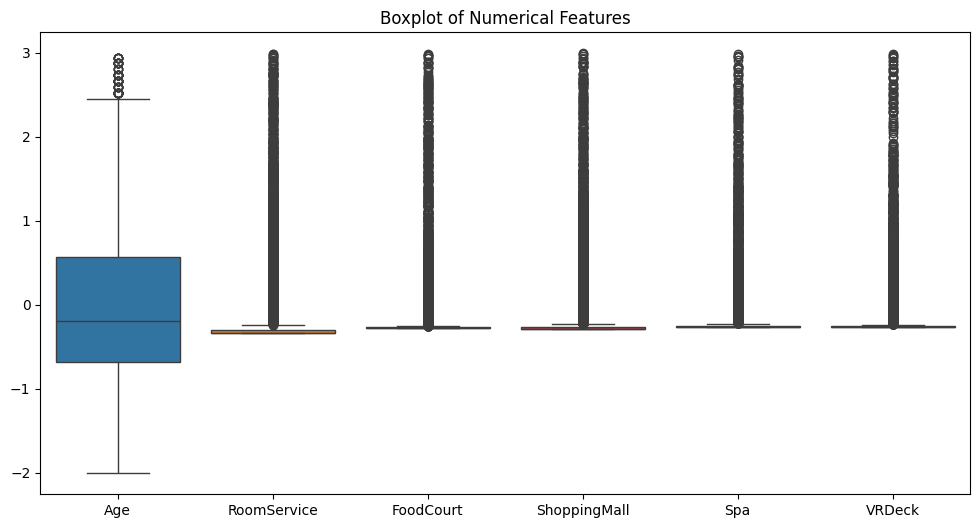

In [35]:
# Vẽ sơ đồ hộp để kiểm tra giá trị ngoại lai
import matplotlib.pyplot as plt
import seaborn as sns  

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
plt.title('Boxplot of Numerical Features') 
plt.show()

In [ ]:
# Phân 2: Chia mô hình
from sklearn.model_selection import train_test_split

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [37]:
#Phần 3: Huấn luyện mô hình

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import lightgbm as lgb
import xgboost as xgb

from sklearn.model_selection import GridSearchCV

# Sử dụng phương pháp đánh giá chéo để tìm ra mô hình và tham sô tối ưu


# Tạo ra các lưới tham số riêng cho từng loại mô hình
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1.0, 10],
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_leaf': [2, 4]
    },
    'LGBM': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'num_leaves': [20, 31]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [5, 7]
    }
}

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'LGBM': lgb.LGBMClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# --- 2. Lặp qua từng mô hình để chạy GridSearchCV ---

print("\n--- Bắt đầu tìm kiếm mô hình và siêu tham số tốt nhất ---")
best_models = {}

for name, model in models.items():
    print(f"\nĐang chạy GridSearchCV cho mô hình: {name}")
    
    # Lấy lưới tham số tương ứng với mô hình
    grid = param_grids[name]
    
    # Khởi tạo và chạy GridSearchCV cho mô hình hiện tại
    grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Lưu lại mô hình tốt nhất và điểm số
    best_models[name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
    }
    
    print(f"Hoàn tất. Điểm accuracy tốt nhất: {grid_search.best_score_:.4f}")
    print(f"Cấu hình tốt nhất: {grid_search.best_params_}")

# --- 3. In ra kết quả cuối cùng ---
print("\n--- Huấn luyện hoàn tất! ---")
# Tìm ra mô hình có điểm số cao nhất trong tất cả
best_model_name = max(best_models, key=lambda name: best_models[name]['best_score'])
final_model = best_models[best_model_name]['best_estimator']
final_score = best_models[best_model_name]['best_score']

print(f"\n=> Mô hình tốt nhất chung cuộc là: '{best_model_name}'")
print(f"=> Với điểm accuracy trên tập huấn luyện (cross-validated) là: {final_score:.4f}")
print(f"=> Với cấu hình: {best_models[best_model_name]['best_params']}")



--- Bắt đầu tìm kiếm mô hình và siêu tham số tốt nhất ---

Đang chạy GridSearchCV cho mô hình: Logistic Regression
Hoàn tất. Điểm accuracy tốt nhất: 0.7831
Cấu hình tốt nhất: {'C': 1.0}

Đang chạy GridSearchCV cho mô hình: Random Forest
Hoàn tất. Điểm accuracy tốt nhất: 0.7955
Cấu hình tốt nhất: {'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 200}

Đang chạy GridSearchCV cho mô hình: LGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2605, number of negative: 2356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1382
[LightGBM] [Info] Number of data points in the train set: 4961, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.525096 -> initscore=0.100467
[LightGBM] [Info] 

c:\Users\tranv\miniconda3\envs\machineLearning\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:23:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\tranv\miniconda3\envs\machineLearning\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:23:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\tranv\miniconda3\envs\machineLearning\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:23:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\tranv\miniconda3\envs\machineLearning\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:23:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\

Hoàn tất. Điểm accuracy tốt nhất: 0.7962
Cấu hình tốt nhất: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}

--- Huấn luyện hoàn tất! ---

=> Mô hình tốt nhất chung cuộc là: 'XGBoost'
=> Với điểm accuracy trên tập huấn luyện (cross-validated) là: 0.7962
=> Với cấu hình: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


c:\Users\tranv\miniconda3\envs\machineLearning\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:23:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\tranv\miniconda3\envs\machineLearning\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:23:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# Phần 4: Đánh giá mô hình dựa trên tập test
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dự đoán trên tập test
y_pred = final_model.predict(X_test)

# Tính độ chính xác trên tập test
test_accuracy = accuracy_score(y_test, y_pred)

print("=" * 60)
print("KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH TRÊN TẬP TEST")
print("=" * 60)
print(f"Mô hình được sử dụng: {best_model_name}")
print(f"Độ chính xác trên tập huấn luyện (CV): {final_score:.4f}")
print(f"Độ chính xác trên tập test: {test_accuracy:.4f}")
print(f"Chênh lệch: {abs(final_score - test_accuracy):.4f}")

print("\n" + "=" * 40)
print("CLASSIFICATION REPORT")
print("=" * 40)
print(classification_report(y_test, y_pred, target_names=['Không được vận chuyển', 'Được vận chuyển']))

print("\n" + "=" * 40)
print("CONFUSION MATRIX")
print("=" * 40)
cm = confusion_matrix(y_test, y_pred)
print("Ma trận nhầm lẫn:")
print(f"                 Dự đoán")
print(f"Thực tế      0      1")
print(f"   0      {cm[0,0]:4d}   {cm[0,1]:4d}")
print(f"   1      {cm[1,0]:4d}   {cm[1,1]:4d}")

print(f"\nGiải thích:")
print(f"- True Negatives (TN): {cm[0,0]} - Dự đoán đúng 'không được vận chuyển'")
print(f"- False Positives (FP): {cm[0,1]} - Dự đoán sai 'được vận chuyển'")
print(f"- False Negatives (FN): {cm[1,0]} - Dự đoán sai 'không được vận chuyển'")
print(f"- True Positives (TP): {cm[1,1]} - Dự đoán đúng 'được vận chuyển'")

KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH TRÊN TẬP TEST
Mô hình được sử dụng: XGBoost
Độ chính xác trên tập huấn luyện (CV): 0.7962
Độ chính xác trên tập test: 0.7859
Chênh lệch (có thể là overfitting): 0.0103

CLASSIFICATION REPORT
                       precision    recall  f1-score   support

Không được vận chuyển       0.80      0.75      0.77       760
      Được vận chuyển       0.77      0.82      0.80       791

             accuracy                           0.79      1551
            macro avg       0.79      0.79      0.79      1551
         weighted avg       0.79      0.79      0.79      1551


CONFUSION MATRIX
Ma trận nhầm lẫn:
                 Dự đoán
Thực tế      0      1
   0       571    189
   1       143    648

Giải thích:
- True Negatives (TN): 571 - Dự đoán đúng 'không được vận chuyển'
- False Positives (FP): 189 - Dự đoán sai 'được vận chuyển'
- False Negatives (FN): 143 - Dự đoán sai 'không được vận chuyển'
- True Positives (TP): 648 - Dự đoán đúng 'được vận chuyển'
